# **Semantic Segmentation**
## **Author: Davy SIMEU**

# I. PyTorch Tutorial

First let us build a start by discovering PyTorch.

In [1]:
import torch
import numpy as np

We are now going to build our first tensors. In Pytorch everything is based on tensors, while in Numpy it is base on  arrays. There are similarities, but it is not the same thing!

In [2]:
# Different way to build a tensor
x = torch.empty(5,3)
print('empty', x)
print(x.size()) # by doing x.size() can see the shape of tensor x

x = torch.rand(5,3)
print('random', x)

x = torch.zeros(5,3, dtype=torch.long) # you build a tensor with just zeros
print('zeros', x)

x = torch.tensor([5.5,3]) # you build a tensor from an list
print('tensor', x)

x = torch.ones(10,3) # you build a tensor with just ones
print('ones', x)

x = torch.randn_like(x, dtype=torch.float) # you override dtype!
print(x)

empty tensor([[ 0.0000e+00,  0.0000e+00,  2.1019e-44],
        [ 0.0000e+00, -3.1152e-38,  7.3989e-43],
        [ 7.0374e+22,  6.9983e+28,  0.0000e+00],
        [ 0.0000e+00,  2.1019e-44,  0.0000e+00],
        [-8.9542e-38,  7.3989e-43,  2.0027e-19]])
torch.Size([5, 3])
random tensor([[0.5137, 0.3142, 0.1294],
        [0.9871, 0.7678, 0.1174],
        [0.0408, 0.0809, 0.2249],
        [0.3215, 0.7196, 0.8431],
        [0.8976, 0.3469, 0.2572]])
zeros tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor tensor([5.5000, 3.0000])
ones tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 0.1551, -1.5054, -1.7653],
        [ 0.4473, -1.9538,  0.0339],
        [ 0.0153,  0.2208,  0.3956],
        [-2.0256,  0.1797, -1.0102],
        [ 0.0136, -2.1434, -0.0107],
      

Now let us play with operations between tensors.

In [3]:
y = torch.rand(5,3)
x = torch.ones(5,3)
z = x+y
print(z)

tensor([[1.9101, 1.1962, 1.1172],
        [1.6042, 1.6472, 1.1923],
        [1.9420, 1.0220, 1.8909],
        [1.3709, 1.0393, 1.4780],
        [1.5969, 1.9813, 1.3168]])


In [4]:
# Here are 3 different ways to change the shape of x
print('x =', x)
x0 = x.view((3,5))
print('\noriginal shape of x', x.size(), 'new shape', x0.size())
print(x0)

x1 = x.view(-1)
print('\noriginal shape of x', x.size(), 'new shape', x1.size())
print('x1 =', x1)

x2 = x.transpose(0,1)
print('\noriginal shape of x', x.size(), 'new shape', x2.size())
print('x2 =', x2)

x3 = x.reshape((3,5))
print('\noriginal shape of x', x.size(), 'new shape', x3.size())
print('x3 =', x3)

x = tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

original shape of x torch.Size([5, 3]) new shape torch.Size([15])
x1 = tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
x2 = tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

original shape of x torch.Size([5, 3]) new shape torch.Size([3, 5])
x3 = tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


From Pytorch to Numpy.

In [5]:
x = torch.randn(4, 4)
print('the type of x is:', type(x))
xnumpy = x.numpy()
print('the type of xnumpy is:', type(xnumpy))

the type of x is: <class 'torch.Tensor'>
the type of xnumpy is: <class 'numpy.ndarray'>


In [6]:
x2 = torch.tensor([1.0])
print('the type of x is:', type(x2))
x2numpy = x2.numpy()
print('the type of xnumpy is:', type(x2numpy))
x2numpy = x2.item()
print('the type of xnumpy is:', type(x2numpy))

the type of x is: <class 'torch.Tensor'>
the type of xnumpy is: <class 'numpy.ndarray'>
the type of xnumpy is: <class 'float'>


In [7]:
y = xnumpy+x

TypeError: Concatenation operation is not implemented for NumPy arrays, use np.concatenate() instead. Please do not rely on this error; it may not be given on all Python implementations.

This does not work because of type incompatibily for the operator ``+`` in python involving a ``numpy.ndarray`` and a ``Tensor``. We cannot sum those together.

In [8]:
# Bringing some data to GPU
print(f'Is CUDA available on this computer? {torch.cuda.is_available()}')
print('CUDA current device', torch.cuda.current_device())

a = torch.tensor(np.ones(5))
print(a.device)
a_cuda = a.to(torch.device('cuda')) # or a.to('cuda') or a.cuda()
print(a_cuda.device)

print(a)
print(a_cuda)

Is CUDA available on this computer? True
CUDA current device 0
cpu
cuda:0
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], device='cuda:0', dtype=torch.float64)


# II. Training a FCN for semantic segmentation

---
Now let us perform a semantic segmentation with a Fully Convolutional Network (FCN) which is a type of Deep Neural Network (DNN). 

We will first build a dataloader and then train the DNN.

In [9]:
# Here are the training parameters
batch_size = 10
learning_rate = 1e-3
weight_decay = 2e-4
lr_decay_epochs = 20
lr_decay = 0.1
nb_epochs = 50

## A. Building dataset

Please note that we set as background the car, the bicyclist and the pedestrian, so the CNN never "see" these classes.

In [10]:
import os
import utils
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.utils.data as data
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from PIL import Image

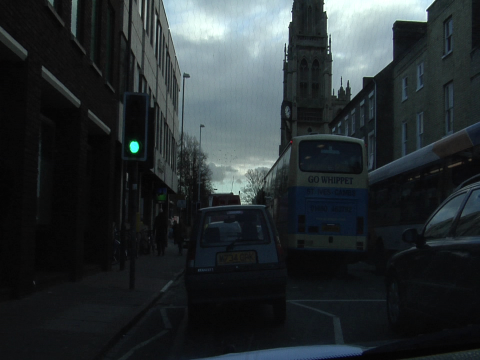

In [11]:
#  Please check that you can read an image from CamVid dataset
path_data = 'CamVid'
im = Image.open(path_data+"/train/0001TP_006690.png")
im

Here is a set of utils function for the dataset and the evaluation.

In [12]:
from collections import OrderedDict
from torchvision.transforms import ToPILImage
import torchvision.models as models


def get_files(folder, name_filter=None, extension_filter=None):
    """Helper function that returns the list of files in a specified folder
    with a specified extension.

    Keyword arguments:
    - folder (``string``): The path to a folder.
    - name_filter (``string``, optional): The returned files must contain
    this substring in their filename. Default: None; files are not filtered.
    - extension_filter (``string``, optional): The desired file extension.
    Default: None; files are not filtered.
    
    """
    if not os.path.isdir(folder):
        raise RuntimeError("\"{0}\" is not a folder.".format(folder))

    # Filename filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files that do not
    # contain "name_filter"
    if name_filter is None:
        # This looks hackish...there is probably a better way
        name_cond = lambda filename: True
    else:
        name_cond = lambda filename: name_filter in filename

    # Extension filter: if not specified don't filter (condition always true);
    # otherwise, use a lambda expression to filter out files whose extension
    # is not "extension_filter"
    if extension_filter is None:
        # This looks hackish...there is probably a better way
        ext_cond = lambda filename: True
    else:
        ext_cond = lambda filename: filename.endswith(extension_filter)

    filtered_files = []

    # Explore the directory tree to get files that contain "name_filter" and
    # with extension "extension_filter"
    for path, _, files in os.walk(folder):
        files.sort()
        for file in files:
            if name_cond(file) and ext_cond(file):
                full_path = os.path.join(path, file)
                filtered_files.append(full_path)

    return filtered_files

def pil_loader(data_path, label_path):
    """Loads a sample and label image given their path as PIL images.

    Keyword arguments:
    - data_path (``string``): The filepath to the image.
    - label_path (``string``): The filepath to the ground-truth image.

    Returns the image and the label as PIL images.

    """
    data = Image.open(data_path)
    label = Image.open(label_path)

    return data, label

def batch_transform(batch, transform):
    """Applies a transform to a batch of samples.

    Keyword arguments:
    - batch (): a batch os samples.
    - transform (callable): A function/transform to apply to ``batch``.
    
    """
    # Convert the single channel label to RGB in tensor form
    # 1. torch.unbind removes the 0-dimension of "labels" and returns a tuple of
    # all slices along that dimension
    # 2. the transform is applied to each slice
    transf_slices = [transform(tensor) for tensor in torch.unbind(batch)]

    return torch.stack(transf_slices)

def remap(image, old_values, new_values):
    assert isinstance(image, Image.Image) or \
        isinstance(image, np.ndarray), "image must be of type PIL.Image or numpy.ndarray"
    assert type(new_values) is tuple, "new_values must be of type tuple"
    assert type(old_values) is tuple, "old_values must be of type tuple"
    assert len(new_values) == len(old_values), "new_values and old_values must have the same length"

    # If image is a PIL.Image convert it to a numpy array
    if isinstance(image, Image.Image):
        image = np.array(image)

    # Replace old values by the new ones
    tmp = np.zeros_like(image)
    for old, new in zip(old_values, new_values):
        # Since tmp is already initialized as zeros we can skip new values
        # equal to 0
        if new != 0:
            tmp[image == old] = new

    return Image.fromarray(tmp)

def enet_weighing(dataloader, num_classes, c=1.02):
    """Computes class weights as described in the ENet paper:
        w_class = 1 / (ln(c + p_class)),
    where c is usually 1.02 and p_class is the propensity score of that
    class:
        propensity_score = freq_class / total_pixels.

    References: https://arxiv.org/abs/1606.02147

    Keyword arguments:
    - dataloader (``data.Dataloader``): A data loader to iterate over the
    dataset.
    - num_classes (``int``): The number of classes.
    - c (``int``, optional): AN additional hyper-parameter which restricts
    the interval of values for the weights. Default: 1.02.

    """
    class_count = 0
    total = 0
    for _, label in dataloader:
        label = label.cpu().numpy()
        # Flatten label
        flat_label = label.flatten()
        
        # Sum up the number of pixels of each class and the total pixel counts for each label
        class_count += np.bincount(flat_label, minlength=num_classes)
        total += flat_label.size

    # Compute propensity score and then the weights for each class
    propensity_score = class_count / total
    class_weights = 1 / (np.log(c + propensity_score))

    return class_weights


class PILToLongTensor(object):
    """Converts a ``PIL Image`` to a ``torch.LongTensor``.
    Code adapted from: http://pytorch.org/docs/master/torchvision/transforms.html?highlight=totensor
    """

    def __call__(self, pic):
        """Performs the conversion from a ``PIL Image`` to a ``torch.LongTensor``.
        
        Keyword arguments:
        - pic (``PIL.Image``): the image to convert to ``torch.LongTensor``
        Returns:
        A ``torch.LongTensor``.
        
        """
        if not isinstance(pic, Image.Image):
            raise TypeError("pic should be PIL Image. Got {}".format(type(pic)))

        # handle numpy array
        if isinstance(pic, np.ndarray):
            img = torch.from_numpy(pic.transpose((2,0,1)))
            # backward compatibility
            return img.long()

        # Convert PIL image to ByteTensor
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))

        # Reshape tensor
        nchannel = len(pic.mode)
        img = img.view(pic.size[1], pic.size[0], nchannel)

        # Convert to long and squeeze the channels
        return img.transpose(0, 1).transpose(0,2).contiguous().long().squeeze_()


class LongTensorToRGBPIL(object):
    """Converts a ``torch.LongTensor`` to a ``PIL image``.
    The input is a ``torch.LongTensor`` where each pixel's value identifies the
    class.
    
    Keyword arguments:
    - rgb_encoding (``OrderedDict``): An ``OrderedDict`` that relates pixel
    values, class names, and class colors.
    
    """
    
    def __init__(self, rgb_encoding):
        self.rgb_encoding = rgb_encoding

    def __call__(self, tensor):
        """Performs the conversion from ``torch.LongTensor`` to a ``PIL image``.
        
        Keyword arguments:
        - tensor (``torch.LongTensor``): the tensor to convert
        Returns:
        A ``PIL.Image``.
        """
        # Check if label_tensor is a LongTensor
        if not isinstance(tensor, torch.LongTensor):
            raise TypeError("label_tensor should be torch.LongTensor. Got {}".format(type(tensor)))
        # Check if encoding is a ordered dictionary
        if not isinstance(self.rgb_encoding, OrderedDict):
            raise TypeError("encoding should be an OrderedDict. Got {}".format(type(self.rgb_encoding)))

        # label_tensor might be an image without a channel dimension, in this
        # case unsqueeze it
        if len(tensor.size()) == 2:
            tensor.unsqueeze_(0)

        color_tensor = torch.ByteTensor(3, tensor.size(1), tensor.size(2))

        for index, (class_name, color) in enumerate(self.rgb_encoding.items()):
            # Get a mask of elements equal to index
            mask = torch.eq(tensor, index).squeeze_()
            # Fill color_tensor with corresponding colors
            for channel, color_value in enumerate(color):
                color_tensor[channel].masked_fill_(mask, color_value)

        return ToPILImage()(color_tensor)

## B. Building datalaoder

The dataset consists of numerous images of scenes with roads, road signs, cars, pedestrians, trees, pavements, bicyclists, buildings, the sky, etc. 

It showcases the real-life setting which is crucial for use cases like autonomous driving.

In [13]:
get_files(path_data, extension_filter='.jpeg') 

[]

We can notice there are no ``.jpeg`` image file in our dataset after checking.

In [15]:
class CamVid(data.Dataset):
    """CamVid dataset loader where the dataset is arranged as in
    https://github.com/alexgkendall/SegNet-Tutorial/tree/master/CamVid.


    Keyword arguments:
    - root_dir (``string``): Root directory path.
    - mode (``string``): The type of dataset: 'train' for training set, 'val'
    for validation set, and 'test' for test set.
    - transform (``callable``, optional): A function/transform that  takes in
    an PIL image and returns a transformed version. Default: None.
    - label_transform (``callable``, optional): A function/transform that takes
    in the target and transforms it. Default: None.
    - loader (``callable``, optional): A function to load an image given its
    path. By default ``default_loader`` is used.

    """
    # Training dataset root folders
    train_folder = 'train'
    train_lbl_folder = 'trainannot'

    # Validation dataset root folders
    val_folder = 'val'
    val_lbl_folder = 'valannot'

    # Test dataset root folders
    test_folder = 'test'
    test_lbl_folder = 'testannot'

    # Images extension
    img_extension = '.png'

    # Default encoding for pixel value, class name, and class color
    color_encoding = OrderedDict([
        ('sky', (128, 128, 128)),
        ('building', (128, 0, 0)),
        ('pole', (192, 192, 128)),
        ('road_marking', (255, 69, 0)),
        ('road', (128, 64, 128)),
        ('pavement', (60, 40, 222)),
        ('tree', (128, 128, 0)),
        ('sign_symbol', (192, 128, 128)),
        ('fence', (64, 64, 128)),
        ('car', (64, 0, 128)),
        ('pedestrian', (64, 64, 0)),
        ('bicyclist', (0, 128, 192)),
        ('unlabeled', (0, 0, 0))
    ])

    def __init__(self,
                 root_dir,
                 mode='train',
                 transform=None,
                 label_transform=None,
                 loader=pil_loader):
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform
        self.label_transform = label_transform
        self.loader = loader

        if self.mode.lower() == 'train':
            # Get the training data and labels filepaths
            self.train_data = get_files(os.path.join(root_dir, self.train_folder),
                extension_filter=self.img_extension)

            self.train_labels = get_files(os.path.join(root_dir, self.train_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'val':
            # Get the validation data and labels filepaths
            self.val_data = get_files(
                os.path.join(root_dir, self.val_folder),
                extension_filter=self.img_extension)

            self.val_labels = get_files(
                os.path.join(root_dir, self.val_lbl_folder),
                extension_filter=self.img_extension)
        elif self.mode.lower() == 'test':
            # Get the test data and labels filepaths
            self.test_data = get_files(
                os.path.join(root_dir, self.test_folder),
                extension_filter=self.img_extension)

            self.test_labels = get_files(
                os.path.join(root_dir, self.test_lbl_folder),
                extension_filter=self.img_extension)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

    def __getitem__(self, index):
        """
        Args:
        - index (``int``): index of the item in the dataset

        Returns:
        A tuple of ``PIL.Image`` (image, label) where label is the ground-truth
        of the image.

        """
        if self.mode.lower() == 'train':
            data_path, label_path = self.train_data[index], self.train_labels[
                index]
        elif self.mode.lower() == 'val':
            data_path, label_path = self.val_data[index], self.val_labels[
                index]
        elif self.mode.lower() == 'test':
            data_path, label_path = self.test_data[index], self.test_labels[
                index]
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

        img, label = self.loader(data_path, label_path)

        if self.transform is not None:
            img = self.transform(img)

        if self.label_transform is not None:
            label = self.label_transform(label)

        return img, label

    def __len__(self):
        """Returns the length of the dataset."""
        if self.mode.lower() == 'train':
            return len(self.train_data)
        elif self.mode.lower() == 'val':
            return len(self.val_data)
        elif self.mode.lower() == 'test':
            return len(self.test_data)
        else:
            raise RuntimeError("Unexpected dataset mode. "
                               "Supported modes are: train, val and test")

In [16]:
print("Loading dataset...")
print("Dataset directory:", path_data)

image_transform = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

label_transform = transforms.Compose([
        transforms.Resize((360, 480), Image.NEAREST),
        PILToLongTensor()
    ])

image_transform_test = transforms.Compose(
        [transforms.Resize((360, 480)),
         transforms.ToTensor()])

# Get selected dataset
# Load the training set as tensors
train_set = CamVid(
        path_data,
        transform=image_transform,
        label_transform=label_transform)
train_loader = data.DataLoader(
        train_set,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0)

# Load the validation set as tensors
val_set = CamVid(
        path_data,
        mode='val',
        transform=image_transform,
        label_transform=label_transform)
val_loader = data.DataLoader(
        val_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0)

# Load the test set as tensors
test_set = CamVid(
        path_data,
        mode='test',
        transform=image_transform_test,
        label_transform=label_transform)
test_loader = data.DataLoader(
        test_set,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0)

# Get encoding between pixel valus in label images and RGB colors
class_encoding = train_set.color_encoding
# Remove the road_marking class from the CamVid dataset as it's merged
# with the road class
#del class_encoding['road_marking']

# Get number of classes to predict
num_classes = len(class_encoding)

# Print information for debugging
print("Number of classes to predict:", num_classes)
print("Train dataset size:", len(train_set))
print("Validation dataset size:", len(val_set))

# Get a batch of samples to display

images, labels = iter(test_loader).next()
print("Image size:", images.size())
print("Label size:", labels.size())
print("Class-color encoding:", class_encoding)


# Get class weights from the selected weighing technique
print("\nComputing class weights... (This can take a while depending on the dataset size)")

class_weights = enet_weighing(train_loader, num_classes)
class_weights = torch.from_numpy(class_weights).float().cuda() 

# Set the weight of the unlabeled class to 0
ignore_index = list(class_encoding).index('unlabeled')
class_weights[ignore_index] = 0
print("Class weights:", class_weights)

Loading dataset...
Dataset directory: CamVid
Number of classes to predict: 13
Train dataset size: 367
Validation dataset size: 101
Image size: torch.Size([10, 3, 360, 480])
Label size: torch.Size([10, 360, 480])
Class-color encoding: OrderedDict([('sky', (128, 128, 128)), ('building', (128, 0, 0)), ('pole', (192, 192, 128)), ('road_marking', (255, 69, 0)), ('road', (128, 64, 128)), ('pavement', (60, 40, 222)), ('tree', (128, 128, 0)), ('sign_symbol', (192, 128, 128)), ('fence', (64, 64, 128)), ('car', (64, 0, 128)), ('pedestrian', (64, 64, 0)), ('bicyclist', (0, 128, 192)), ('unlabeled', (0, 0, 0))])

Computing class weights... (This can take a while depending on the dataset size)


c:\Users\davys\anaconda3\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


Class weights: tensor([ 5.7920,  4.4403, 34.0217,  3.4469, 15.9119,  9.0202, 32.0138, 32.4789,
        13.2071, 38.3877, 44.1345, 17.3064,  0.0000], device='cuda:0')


**Why do we need to evaluate the class_weights?**

- It is useful when the dataset is imbalanced w.r.t the classes (labels) present in it. It is a means to enforce the model to conveniently consider rare labels during its training and consequently succeed in predicting them afterwards.
- It also tells the models to ignore the placeholder class ``unlabeled`` that corresponds to all the images which are not annotated.
- Sometimes, it is actually used to preserve that classes repartition (weighting) when splitting data into test and training data (stratify).

## C. Building FCN

In [17]:
class FCN32s(nn.Module):
    def __init__(self, pretrained_net, n_classes):
        super().__init__()
        self.n_classes = n_classes
        self.vgg16 = models.vgg16(pretrained=pretrained_net)
        self.pretrained_net = list(self.vgg16.children())[0]
        self.relu    = nn.ReLU(inplace=True)
        self.deconv1 = nn.ConvTranspose2d(512, 128, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn1     = nn.BatchNorm2d(128)
        self.deconv2 = nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn2     = nn.BatchNorm2d(128)
        self.deconv3 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn3     = nn.BatchNorm2d(64)
        self.deconv4 = nn.ConvTranspose2d(64, 64, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn4     = nn.BatchNorm2d(64)
        self.deconv5 = nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, dilation=1, output_padding=1)
        self.bn5     = nn.BatchNorm2d(32)
        self.classifier = nn.Conv2d(32, n_classes, kernel_size=1)

    def forward(self, x):
        (_,_,H,W) = x.size()
        x5 = self.pretrained_net(x)
        score = self.bn1(self.relu(self.deconv1(x5)))   
        score = self.bn2(self.relu(self.deconv2(score)))
        score = self.bn3(self.relu(self.deconv3(score)))
        score = self.bn4(self.relu(self.deconv4(score)))
        score = self.bn5(self.relu(self.deconv5(score)))
        score = self.classifier(score)
        # I added this last layer to be sure about the final size
        score =  F.interpolate(score, size=(H,W), mode='bilinear', align_corners=True) 

        return score  # size=(N, n_class, x.H/1, x.W/1)

**Why do I need to simplify the DNN?**

Simply because this makes the model:
- To have less parameters $\implies$ Easier to train (it could even leads to faster convergence).
- Lighter for the GPU resources allocated to us.

Simpler architecture means ease to understand and keep track of the flow of the data through the network, explainability...

## D. Utility functions

### 1. Metrics

In [18]:
class Metric(object):
    """Base class for all metrics.
    From: https://github.com/pytorch/tnt/blob/master/torchnet/meter/meter.py
    
    """
    
    def reset(self):
        pass

    def add(self):
        pass

    def value(self):
        pass


class ConfusionMatrix(Metric):
    """Constructs a confusion matrix for a multi-class classification problems.
    Does not support multi-label, multi-class problems.
    
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem.
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    Modified from: https://github.com/pytorch/tnt/blob/master/torchnet/meter/confusionmeter.py
    
    """

    def __init__(self, num_classes, normalized=False):
        super().__init__()

        self.conf = np.ndarray((num_classes, num_classes), dtype=np.int32)
        self.normalized = normalized
        self.num_classes = num_classes
        self.reset()

    def reset(self):
        self.conf.fill(0)

    def add(self, predicted, target):
        """Computes the confusion matrix.
        The shape of the confusion matrix is K x K, where K is the number of classes.
        
        Keyword arguments:
        - predicted (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        predicted scores obtained from the model for N examples and K classes,
        or an N-tensor/array of integer values between 0 and K-1.
        - target (Tensor or numpy.ndarray): Can be an N x K tensor/array of
        ground-truth classes for N examples and K classes, or an N-tensor/array
        of integer values between 0 and K-1.
        
        """
        # If target and/or predicted are tensors, convert them to numpy arrays
        if torch.is_tensor(predicted):
            predicted = predicted.cpu().numpy()
        if torch.is_tensor(target):
            target = target.cpu().numpy()

        assert predicted.shape[0] == target.shape[0], \
            'number of targets and predicted outputs do not match'

        if np.ndim(predicted) != 1:
            assert predicted.shape[1] == self.num_classes, \
                'number of predictions does not match size of confusion matrix'
            predicted = np.argmax(predicted, 1)
        else:
            assert (predicted.max() < self.num_classes) and (predicted.min() >= 0), \
                'predicted values are not between 0 and k-1'

        if np.ndim(target) != 1:
            assert target.shape[1] == self.num_classes, \
                'Onehot target does not match size of confusion matrix'
            assert (target >= 0).all() and (target <= 1).all(), \
                'in one-hot encoding, target values should be 0 or 1'
            assert (target.sum(1) == 1).all(), 'multi-label setting is not supported'
            target = np.argmax(target, 1)
        else:
            assert (target.max() < self.num_classes) and (target.min() >= 0), \
                'target values are not between 0 and k-1'

        # hack for bincounting 2 arrays together
        x = predicted + self.num_classes * target
        bincount_2d = np.bincount(
            x.astype(np.int32), minlength=self.num_classes**2)
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape((self.num_classes, self.num_classes))

        self.conf += conf

    def value(self):
        """
        Returns:
            Confustion matrix of K rows and K columns, where rows corresponds
            to ground-truth targets and columns corresponds to predicted
            targets.

        """
        if self.normalized:
            conf = self.conf.astype(np.float32)
            return conf / conf.sum(1).clip(min=1e-12)[:, None]
        else:
            return self.conf


class IoU(Metric):
    """Computes the intersection over union (IoU) per class and corresponding
    mean (mIoU).
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
        
    Keyword arguments:
    - num_classes (int): number of classes in the classification problem
    - normalized (boolean, optional): Determines whether or not the confusion
    matrix is normalized or not. Default: False.
    - ignore_index (int or iterable, optional): Index of the classes to ignore
    when computing the IoU. Can be an int, or any iterable of ints.
    
    """

    def __init__(self, num_classes, normalized=False, ignore_index=None):
        super().__init__()
        self.conf_metric = ConfusionMatrix(num_classes, normalized)

        if ignore_index is None:
            self.ignore_index = None
        elif isinstance(ignore_index, int):
            self.ignore_index = (ignore_index,)
        else:
            try:
                self.ignore_index = tuple(ignore_index)
            except TypeError:
                raise ValueError("'ignore_index' must be an int or iterable")

    def reset(self):
        self.conf_metric.reset()

    def add(self, predicted, target):
        """Adds the predicted and target pair to the IoU metric.
        
        Keyword arguments:
        - predicted (Tensor): Can be a (N, K, H, W) tensor of
        predicted scores obtained from the model for N examples and K classes,
        or (N, H, W) tensor of integer values between 0 and K-1.
        - target (Tensor): Can be a (N, K, H, W) tensor of
        target scores for N examples and K classes, or (N, H, W) tensor of
        integer values between 0 and K-1.
        
        """
        # Dimensions check
        assert predicted.size(0) == target.size(0), \
            'number of targets and predicted outputs do not match'
        assert predicted.dim() == 3 or predicted.dim() == 4, \
            "predictions must be of dimension (N, H, W) or (N, K, H, W)"
        assert target.dim() == 3 or target.dim() == 4, \
            "targets must be of dimension (N, H, W) or (N, K, H, W)"

        # If the tensor is in categorical format convert it to integer format
        if predicted.dim() == 4:
            _, predicted = predicted.max(1)
        if target.dim() == 4:
            _, target = target.max(1)

        self.conf_metric.add(predicted.view(-1), target.view(-1))

    def value(self):
        """Computes the IoU and mean IoU.
        The mean computation ignores NaN elements of the IoU array.
        
        Returns:
            Tuple: (IoU, mIoU). The first output is the per class IoU, for K classes 
            it's numpy.ndarray with K elements. The second output, is the mean IoU.
            
        """
        conf_matrix = self.conf_metric.value()
        if self.ignore_index is not None:
            for index in self.ignore_index:
                conf_matrix[:, self.ignore_index] = 0
                conf_matrix[self.ignore_index, :] = 0
        true_positive = np.diag(conf_matrix)
        false_positive = np.sum(conf_matrix, 0) - true_positive
        false_negative = np.sum(conf_matrix, 1) - true_positive

        # Just in case we get a division by 0, ignore/hide the error
        with np.errstate(divide='ignore', invalid='ignore'):
            iou = true_positive / (true_positive + false_positive + false_negative)

        return iou, np.nanmean(iou)

In [20]:
# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)
    plt.figure(figsize=(8,6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation losses")
    plt.show()

def plot_accu(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)
    plt.figure(figsize=(8,6))
    plt.plot(x, train_history, color=colors[0], label="Training miou", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation miou", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation MIOUs")
    plt.show()

**What is the IoU?**

IoU means **Intersection over Union**, this is the ratio between the Intersection (the number of pixels that predictions and ground truths have in common) and Union (the overall number of pixels covered by predictions and ground truths). Here IoU serves as a **performance metric**.
- $0 \leq IoU \leq 1$
- When $IoU = 1$, we have a perfect overlap between predictions and ground truths (pretty good model).
- When $IoU = 0$, predictions don't have any pixel in common with ground truths (disastrous model).

### 2. Training function

In [21]:
def train(model, data_loader, optim, criterion, metric,iteration_loss=False):
    """
    Training script: it allows the training of one epoch of the DNN.
    
    input:
        model: the DNN you want to train
        data_loader: the dataloader (the FIFO of data)
        optim: the optimizer you use
        criterion: the criterion you want to optimize
        metric: other criteria
        iteration_loss: boolean that allow you to print the loss
      
    output:
        epoch_loss: the loss of the full epoch
        metric.value(): the value of the other criteria
    """  
    model.train()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        # Forward propagation
        outputs = model(inputs)

        # Loss computation
        optim.zero_grad()
        loss = criterion(outputs, labels)

        # Backpropagation
        loss.backward()
        optim.step()

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of the evaluation metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss/len(data_loader), metric.value()

### 3. Validation function

**Why do I put ``with torch.no_grad():``?**

This enforces the model not to compute the gradients, hence update the weights already learnt. In effect, we don't need it since we are just evaluating the very same trained model (computing the loss function and the metric to assess its performance).

In [22]:
def test(model, data_loader, criterion, metric, iteration_loss=False):
    """
    Validation script: it allows the validationof the DNN.
    
    input:
        model: the DNN you want to train
        data_loader: the dataloader (the FIFO of data)
        criterion: the criterion you hav optimized
        metric: other criteria
        iteration_loss: boolean that allow you to print the loss
        
    output:
        epoch_loss: the loss of the full epoch
        metric.value(): the value of the other criteria
    """
    
    model.eval()
    epoch_loss = 0.0
    metric.reset()
    for step, batch_data in enumerate(data_loader):
        # Get the inputs and labels
        inputs = batch_data[0].cuda()
        labels = batch_data[1].cuda()

        with torch.no_grad():
            # Forward propagation
            outputs = model(inputs)

            # Loss computation
            loss = criterion(outputs, labels)

        # Keep track of loss for current epoch
        epoch_loss += loss.item()

        # Keep track of evaluation the metric
        metric.add(outputs.detach(), labels.detach())

        if iteration_loss:
            print("[Step: %d] Iteration loss: %.4f" % (step, loss.item()))

    return epoch_loss/len(data_loader), metric.value()

## E. Training Process

**Q8/ Please train your DNN and comment?**

In [29]:
# Check the GPU
!nvidia-smi

Wed Jun 15 22:59:55 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.95       Driver Version: 512.95       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   46C    P8     3W /  N/A |    674MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize FCN32s
model = FCN32s(True, num_classes).cuda()

# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss(weight=class_weights)

# We build the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs, lr_decay)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
metric = IoU(num_classes, ignore_index=ignore_index)

# Start Training
best_miou = 0
train_loss_history = []
val_loss_history = []
train_miou_history = []
val_miou_history = []
for epoch in range( nb_epochs):
    print(">>>> [Epoch: {0:d}] Training".format(epoch))
  
    epoch_loss, (iou, miou) = train( model, train_loader, optimizer, criterion, metric) 
    lr_updater.step()
    print(">>>> [Epoch: {0:d}] Loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
    train_miou=miou
    train_loss=epoch_loss
    
    if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:
        print(">>>> [Epoch: {0:d}] Validation".format(epoch))
        loss, (iou, miou) = test(model, val_loader, criterion, metric)
        print(">>>> [Epoch: {0:d}] Loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
        train_loss_history.append(train_loss)
        val_loss_history.append(loss)
        train_miou_history.append(train_miou)
        val_miou_history.append(miou)
        # Print per class IoU on last epoch or if best iou
        if epoch + 1 == nb_epochs or miou > best_miou:
            for key, class_iou in zip(class_encoding.keys(), iou):
                print("{0}: {1:.4f}".format(key, class_iou))
                # Save the model if it's the best thus far
                if miou > best_miou:
                    print("\nBest model thus far. Saving...\n")
                    best_miou = miou
                    utils.save_checkpoint(model, optimizer, epoch + 1, best_miou, args)


Training...



Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\davys/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [02:47<00:00, 3.30MB/s] 


>>>> [Epoch: 0] Training
>>>> [Epoch: 0] Avg. loss: 2.1011 | Mean IoU: 0.1488
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 1.5217 | Mean IoU: 0.2581
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 1.3222 | Mean IoU: 0.2943
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 1.2007 | Mean IoU: 0.3227
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 1.1487 | Mean IoU: 0.3376
>>>> [Epoch: 4] Validation
>>>> [Epoch: 4] Avg. loss: 1.7682 | Mean IoU: 0.2910
sky: 0.6530
building: 0.6415
pole: 0.0000
road_marking: 0.7821
road: 0.2791
pavement: 0.6195
tree: 0.0000
sign_symbol: 0.0000
fence: 0.4728
car: 0.0000
pedestrian: 0.0000
bicyclist: 0.0443
unlabeled: nan
>>>> [Epoch: 5] Training
>>>> [Epoch: 5] Avg. loss: 1.0963 | Mean IoU: 0.3499
>>>> [Epoch: 6] Training
>>>> [Epoch: 6] Avg. loss: 1.0224 | Mean IoU: 0.3724
>>>> [Epoch: 7] Training
>>>> [Epoch: 7] Avg. loss: 0.9997 | Mean IoU: 0.3807
>>>> [Epoch: 8] Training
>>>> [Epoch: 8] Avg. loss: 0.9370 | Mean IoU: 0.4032
>>>> [Epoch: 9

# III. Evaluation of the trained FCN on test data

---

## A. Classical evaluations

In [31]:
plot_losses(train_loss_history, val_loss_history)

: 

: 

In [1]:
plot_accu(train_miou_history, val_miou_history)

NameError: name 'plot_accu' is not defined

### Observations on the learning curves
- The validation loss and metric have unstable progression for early epochs and hopefully settle down later on (especially for the loss).
- As of epoch 35, we can see that the training loss still declines while the validation loss stays still or starts rising, the training loss curve falls under the validation loss: there is **overfitting**.
- Still, the model managed to learn somehow; the learning is quite stable and steady because the loss function doesn't decrease fastly (the local slope is not that high).

**What should we have done to avoid overfitting?**

The model is obviously overfitting near the 35th epoch to avoid that, we could have take advantage of:
* Regularization : DropOut (layers within the model), L2 (in the optimizer)
* Early stopping (during training)
* Data augmentation (in the dataset prior to the training)

In [80]:
# Write the test code and evaluate the results.
test_loss, metric_value = test(model, test_loader, criterion, metric)

for i, metric in enumerate(metric_value[0]):
  print(f'{list(class_encoding)[i]}: {metric}') 

print(f'\n[TEST SET] Avg. loss: {test_loss} | Mean IoU: {metric_value[1]}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


sky: 0.8553340528341401
building: 0.667145575349966
pole: 0.05077077700146475
road_marking: 0.8909151816963661
road: 0.6712859389742446
pavement: 0.6878280393321135
tree: 0.10176515019464297
sign_symbol: 0.25638443963644236
fence: 0.6473132906554183
car: 0.152398534584281
pedestrian: 0.194417849148547
bicyclist: 0.24188077930080532
unlabeled: nan

[TEST SET] Avg. loss: 0.9841846153140068 | Mean IoU: 0.4514533007257026


## B. Uncertainty evaluations with Maximum Class Probability (MCP)
Here we will just use as confidence score the MCP

In [81]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
  batch_outputs = model(batch_images)
  probas = m(batch_outputs)
  pred = torch.argmax(probas, dim=1)
  confidence = probas.max(axis=1)[0]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


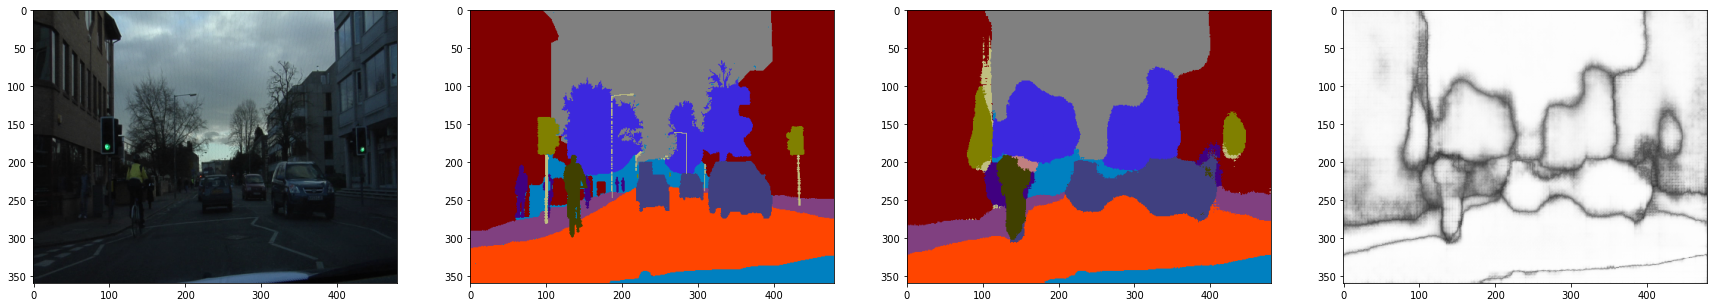

In [82]:
img_id=0
label_to_rgb = transforms.Compose([
        LongTensorToRGBPIL(class_encoding),
        transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()


**Comments**

- The model has very low confidence on object boundaries/edges (expected).
- The smaller the object the less the model confidence. This may be due to some infrormation being lost while forward pass (convolution + max pooling operations). For example, we observe that the pedestrian in front of the building on the left is drowned by the building after prediction: it is possible that (given the aggregation of the convolution operation and the dimension reduction of max pooling) the pedestrian becomes "invisible" to the model.

What we did in the previous cell was to output 13 images (one for each class) per image in the batch, so for each pixel, we have 13 values corresponding to the probability for that pixel to belong to each class. Then we extracted the MCP (max among those 13 probabilities) and its argument (to know which class has that probability). There are 2 resulting images having the same size as the image in the batch. One consisted of the label predicted for each pixel and the other consisted of the related probability. This is why the second to last image shows the class predicted by the DNN while the last image illustrates the confidence score of the DNN: white areas denote regions where the model is pretty confident about its prediction, and darker areas denote regions where the DNN doubts.

We are somewhat happy with the confidence image because according to it we observe that the DNN is pretty confident on pixels that are correctly classified and not that confident pixels misclassified. Meanwhile, the DNN is not really confident in some regions, which is not good (e.g. pedestrian on the left, the center of the image which is a region far from the camera).

# IV. Training a U-Net for semantic segmentation
---

The **U-Net** is a convolutional neural network architecture for fast and precise segmentation of images.

I use the *inconv* *down* and *up* layers to implement a **U-Net**.

*down* is downscale layer, *up* is upscale layer.

I divided by 2 all the number of channels to reduce the load of training. Here is the description of the architecture:

1.   at the begining you should apply a *inconv* with 32 output channels
2.   then you apply *down* with 64 output channels
3.   then you apply *down* with 128 output channels
4.   then you apply *down* with 256 output channels
5.   then you apply *down* with 256 output channels
6.   then you apply *up* with 128 output channels
7.   then you apply *up* with 64 output channels
8.   then you apply *up* with 32 output channels
9.   then you apply *up* with ``n_classes`` output channels

*(don't hesitate to check on internet)*


![unet.png](unet.png)

In [83]:
__all__ = ["UNet"]

class double_conv(nn.Module):
    """(conv => BN => ReLU) * 2"""

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()
        self.bilinear = bilinear

        self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        if self.bilinear:
            x1 = F.interpolate(x1, scale_factor=2, mode='bilinear', align_corners=True)
        else:
            x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])

        # for padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

# please note that we have added dropout layer to be able to use MC dropout

class UNet(nn.Module):
    def __init__(self, classes):
        super(UNet, self).__init__()
        self.inc = inconv(3, 32)
        self.down1 = down(32, 64)
        self.down2 = down(64, 128)
        self.down3 = down(128, 256)
        self.down4 = down(256, 256)
        self.up4 = up(512, 128)
        self.up3 = up(256, 64)
        self.up2 = up(128, 32)
        self.up1 = up(64, 32)

        self.outconv = outconv(32, classes)

    def forward(self, x):
        x1 = self.inc(x)

        # please complete
        d1 = self.down1(x1)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)

        u4 = self.up4(d4, d3)
        u3 = self.up3(u4, d2)
        u2 = self.up2(u3, d1)
        u1 = self.up1(u2, x1)

        x = self.outconv(u1)

        return x

In [84]:
print("\nTraining...\n")
num_classes = len(class_encoding)
# Intialize UNet
model1 = UNet(num_classes).cuda()

# We are going to use the CrossEntropyLoss loss function as it's most
# frequentely used in classification problems with multiple classes which
# fits the problem. This criterion  combines LogSoftMax and NLLLoss.
criterion = nn.CrossEntropyLoss(weight=class_weights)

# We build the optimizer
optimizer = optim.Adam(
        model1.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay)

# Learning rate decay scheduler
lr_updater = lr_scheduler.StepLR(optimizer, lr_decay_epochs,
                                     lr_decay)

# Evaluation metric
ignore_index=[]
ignore_index0 = list(class_encoding).index('unlabeled')
ignore_index.append(ignore_index0)
metric = IoU(num_classes, ignore_index=ignore_index)

# Start Training
best_miou = 0
train_loss_history = []
val_loss_history = []
train_miou_history = []
val_miou_history = []
for epoch in range( nb_epochs):
  print(">>>> [Epoch: {0:d}] Training".format(epoch))
  
  epoch_loss, (iou, miou) = train( model1, train_loader, optimizer, criterion, metric) 
  lr_updater.step()
  print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, epoch_loss, miou))
  train_miou=miou
  train_loss=epoch_loss
  if (epoch + 1) % 5 == 0 or epoch + 1 == nb_epochs:

    print(">>>> [Epoch: {0:d}] Validation".format(epoch))
    loss, (iou, miou) = test(model1, val_loader, criterion, metric)
    print(">>>> [Epoch: {0:d}] Avg. loss: {1:.4f} | Mean IoU: {2:.4f}".format(epoch, loss, miou))
    train_loss_history.append(train_loss)
    val_loss_history.append(loss)
    train_miou_history.append(train_miou)
    val_miou_history.append(miou)
    # Print per class IoU on last epoch or if best iou
    if epoch + 1 == nb_epochs or miou > best_miou:
      for key, class_iou in zip(class_encoding.keys(), iou):
        print("{0}: {1:.4f}".format(key, class_iou))
        # Save the model if it's the best thus far
        """if miou > best_miou:
          print("\nBest model thus far. Saving...\n")
          best_miou = miou
          utils.save_checkpoint(model1, optimizer, epoch + 1, best_miou,
                                      args)"""


Training...

>>>> [Epoch: 0] Training
>>>> [Epoch: 0] Avg. loss: 2.0286 | Mean IoU: 0.1921
>>>> [Epoch: 1] Training
>>>> [Epoch: 1] Avg. loss: 1.6253 | Mean IoU: 0.2499
>>>> [Epoch: 2] Training
>>>> [Epoch: 2] Avg. loss: 1.4256 | Mean IoU: 0.2888
>>>> [Epoch: 3] Training
>>>> [Epoch: 3] Avg. loss: 1.2918 | Mean IoU: 0.3205
>>>> [Epoch: 4] Training
>>>> [Epoch: 4] Avg. loss: 1.1839 | Mean IoU: 0.3494
>>>> [Epoch: 4] Validation
>>>> [Epoch: 4] Avg. loss: 1.2854 | Mean IoU: 0.3543
sky: 0.9323
building: 0.5657
pole: 0.0643
road_marking: 0.8926
road: 0.5932
pavement: 0.7077
tree: 0.0311
sign_symbol: 0.0333
fence: 0.2322
car: 0.0751
pedestrian: 0.0000
bicyclist: 0.1244
unlabeled: nan
>>>> [Epoch: 5] Training
>>>> [Epoch: 5] Avg. loss: 1.1104 | Mean IoU: 0.3722
>>>> [Epoch: 6] Training
>>>> [Epoch: 6] Avg. loss: 1.0059 | Mean IoU: 0.3996
>>>> [Epoch: 7] Training
>>>> [Epoch: 7] Avg. loss: 0.9606 | Mean IoU: 0.4081
>>>> [Epoch: 8] Training
>>>> [Epoch: 8] Avg. loss: 0.9285 | Mean IoU: 0.4169


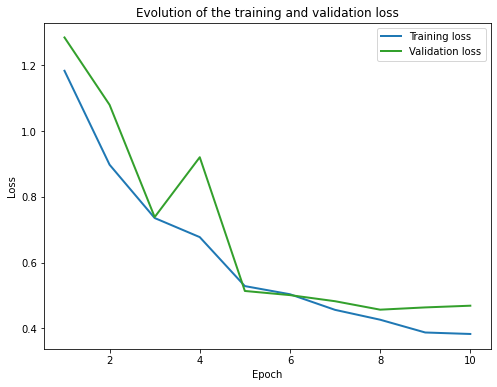

In [90]:
plot_losses(train_loss_history, val_loss_history)

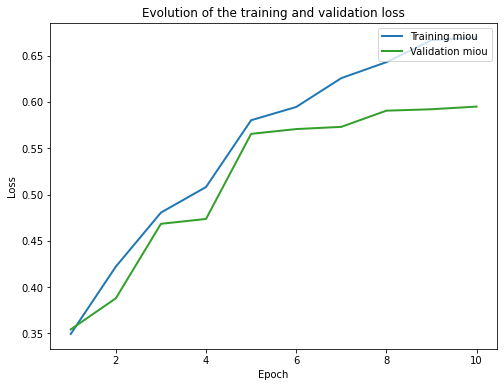

In [91]:
plot_accu(train_miou_history, val_miou_history)

In [ ]:
# Write the test code and evaluate the results.
test_loss, metric_value = test(model1, test_loader, criterion, metric)

for i, metric in enumerate(metric_value[0]):
    print(f'{list(class_encoding)[i]}: {metric}') 

print(f'\n[TEST SET] Loss: {test_loss} | Mean IoU: {metric_value[1]}')

In [ ]:
m = torch.nn.Softmax2d()
batch_images, batch_labels = iter(test_loader).next()
batch_images = batch_images.cuda()
batch_labels = batch_labels.cuda()
model.eval()
with torch.no_grad():
    batch_outputs = model1(batch_images)
    probas = m(batch_outputs)
    pred = torch.argmax(probas, dim=1)
    confidence = probas.max(axis=1)[0]

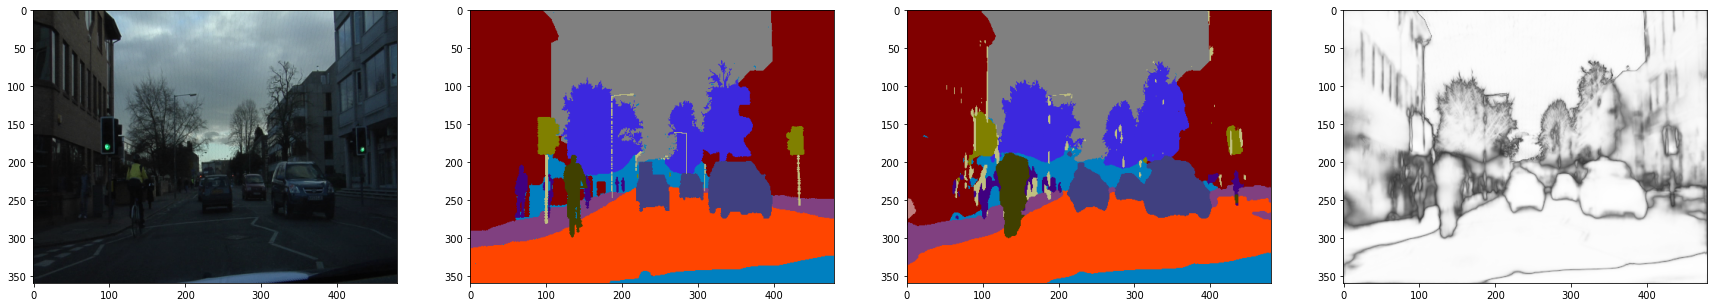

In [89]:
img_id=0
label_to_rgb = transforms.Compose([LongTensorToRGBPIL(class_encoding),transforms.ToTensor()])
color_predictions = batch_transform(pred.cpu(), label_to_rgb)
color_batch_labels = batch_transform(batch_labels.cpu(), label_to_rgb)
image = torchvision.utils.make_grid(batch_images[img_id].cpu()).numpy()
label = torchvision.utils.make_grid(color_batch_labels[img_id]).numpy()
predictionimg = torchvision.utils.make_grid(color_predictions[img_id]).numpy()
confidenceimg = torchvision.utils.make_grid(confidence[img_id].cpu()).numpy()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 15))
ax1.imshow(np.transpose(image, (1, 2, 0)))
ax2.imshow(np.transpose(label, (1, 2, 0)))
ax3.imshow(np.transpose(predictionimg, (1, 2, 0)))
ax4.imshow(np.transpose(confidenceimg, (1, 2, 0)))
plt.show()

# V. Analysis and conclusions

---



---

In this project, we managed to perform image semantic segmentation with 13 classes.

The data come from CamVid dataset which is a collection of videos with object class semantic labels, captured from the point of view of a driving automobile.
There is a wide range of images and the classes are imbalanced.

We saw that the **FCN** model is able to perform semantic segmentation and yields interesting results. But its performance is too low hence the prediction not really reliable (for example in the test image, we can see that it does not detects well the pedestrian, which is detrimental for autonomous driving).
The model demonstrates high variance of performance over classes: it performs well on road and sky (predominant classes because larger area of the any image in the dataset) but really poorly on bicyclists and pedestrians. This is a bit weird because we defined at the beginning the latter classes as part of the background, hence the model was intented to not "see" them.
Moreover, we can see that the model lacks from resolution (it can be explained by the fact that convolution leads to loss of information, it is even worst when stacked to subsampling hence resolution).

This lack of resolution is somehow addressed by the **UNet** architecture. Thanks to the skip connexions, the information is partially recovered and the predictions are refined: it is quite obvisous with the test image.
**The performance are slightly improved (from $0.451$ to $0.489$ Mean $IoU$) and the model overfits less**.

Finally, we should improve the performances of the model by fine tuning hyper-parameters (architecture, number of filters, number, epoch, learning rate, regularization, etc.).